In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\HouseIndia.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df  = pd.read_csv('dataset\HouseIndia.csv')
df.head()

,Area,BHK,Age,City,State,Price (INR)
0,2500,3,10,Mumbai,Maharashtra,"6,00,000"
1,2800,4,8,Pune,Maharashtra,"7,50,000"
2,3200,4,5,Nagpur,Maharashtra,"9,00,000"
3,3000,3,15,Noida,Uttar Pradesh,"5,50,000"
4,3500,4,12,Lucknow,Uttar Pradesh,"8,00,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         117 non-null    int64 
 1   BHK          117 non-null    int64 
 2   Age          117 non-null    int64 
 3   City         117 non-null    object
 4   State        117 non-null    object
 5   Price (INR)  117 non-null    object
dtypes: int64(3), object(3)
memory usage: 5.6+ KB


In [5]:
df.describe().style.background_gradient(cmap='CMRmap')

,Area,BHK,Age
count,117.000000,117.000000,117.000000
mean,3278.632479,3.871795,12.239316
std,402.969379,1.030052,5.613484
min,2500.000000,2.000000,5.000000
25%,3000.000000,3.000000,8.000000
50%,3200.000000,4.000000,12.000000
75%,3500.000000,4.000000,15.000000
max,4600.000000,7.000000,32.000000


In [6]:
df.isna().sum()

Area           0
BHK            0
Age            0
City           0
State          0
Price (INR)    0
dtype: int64

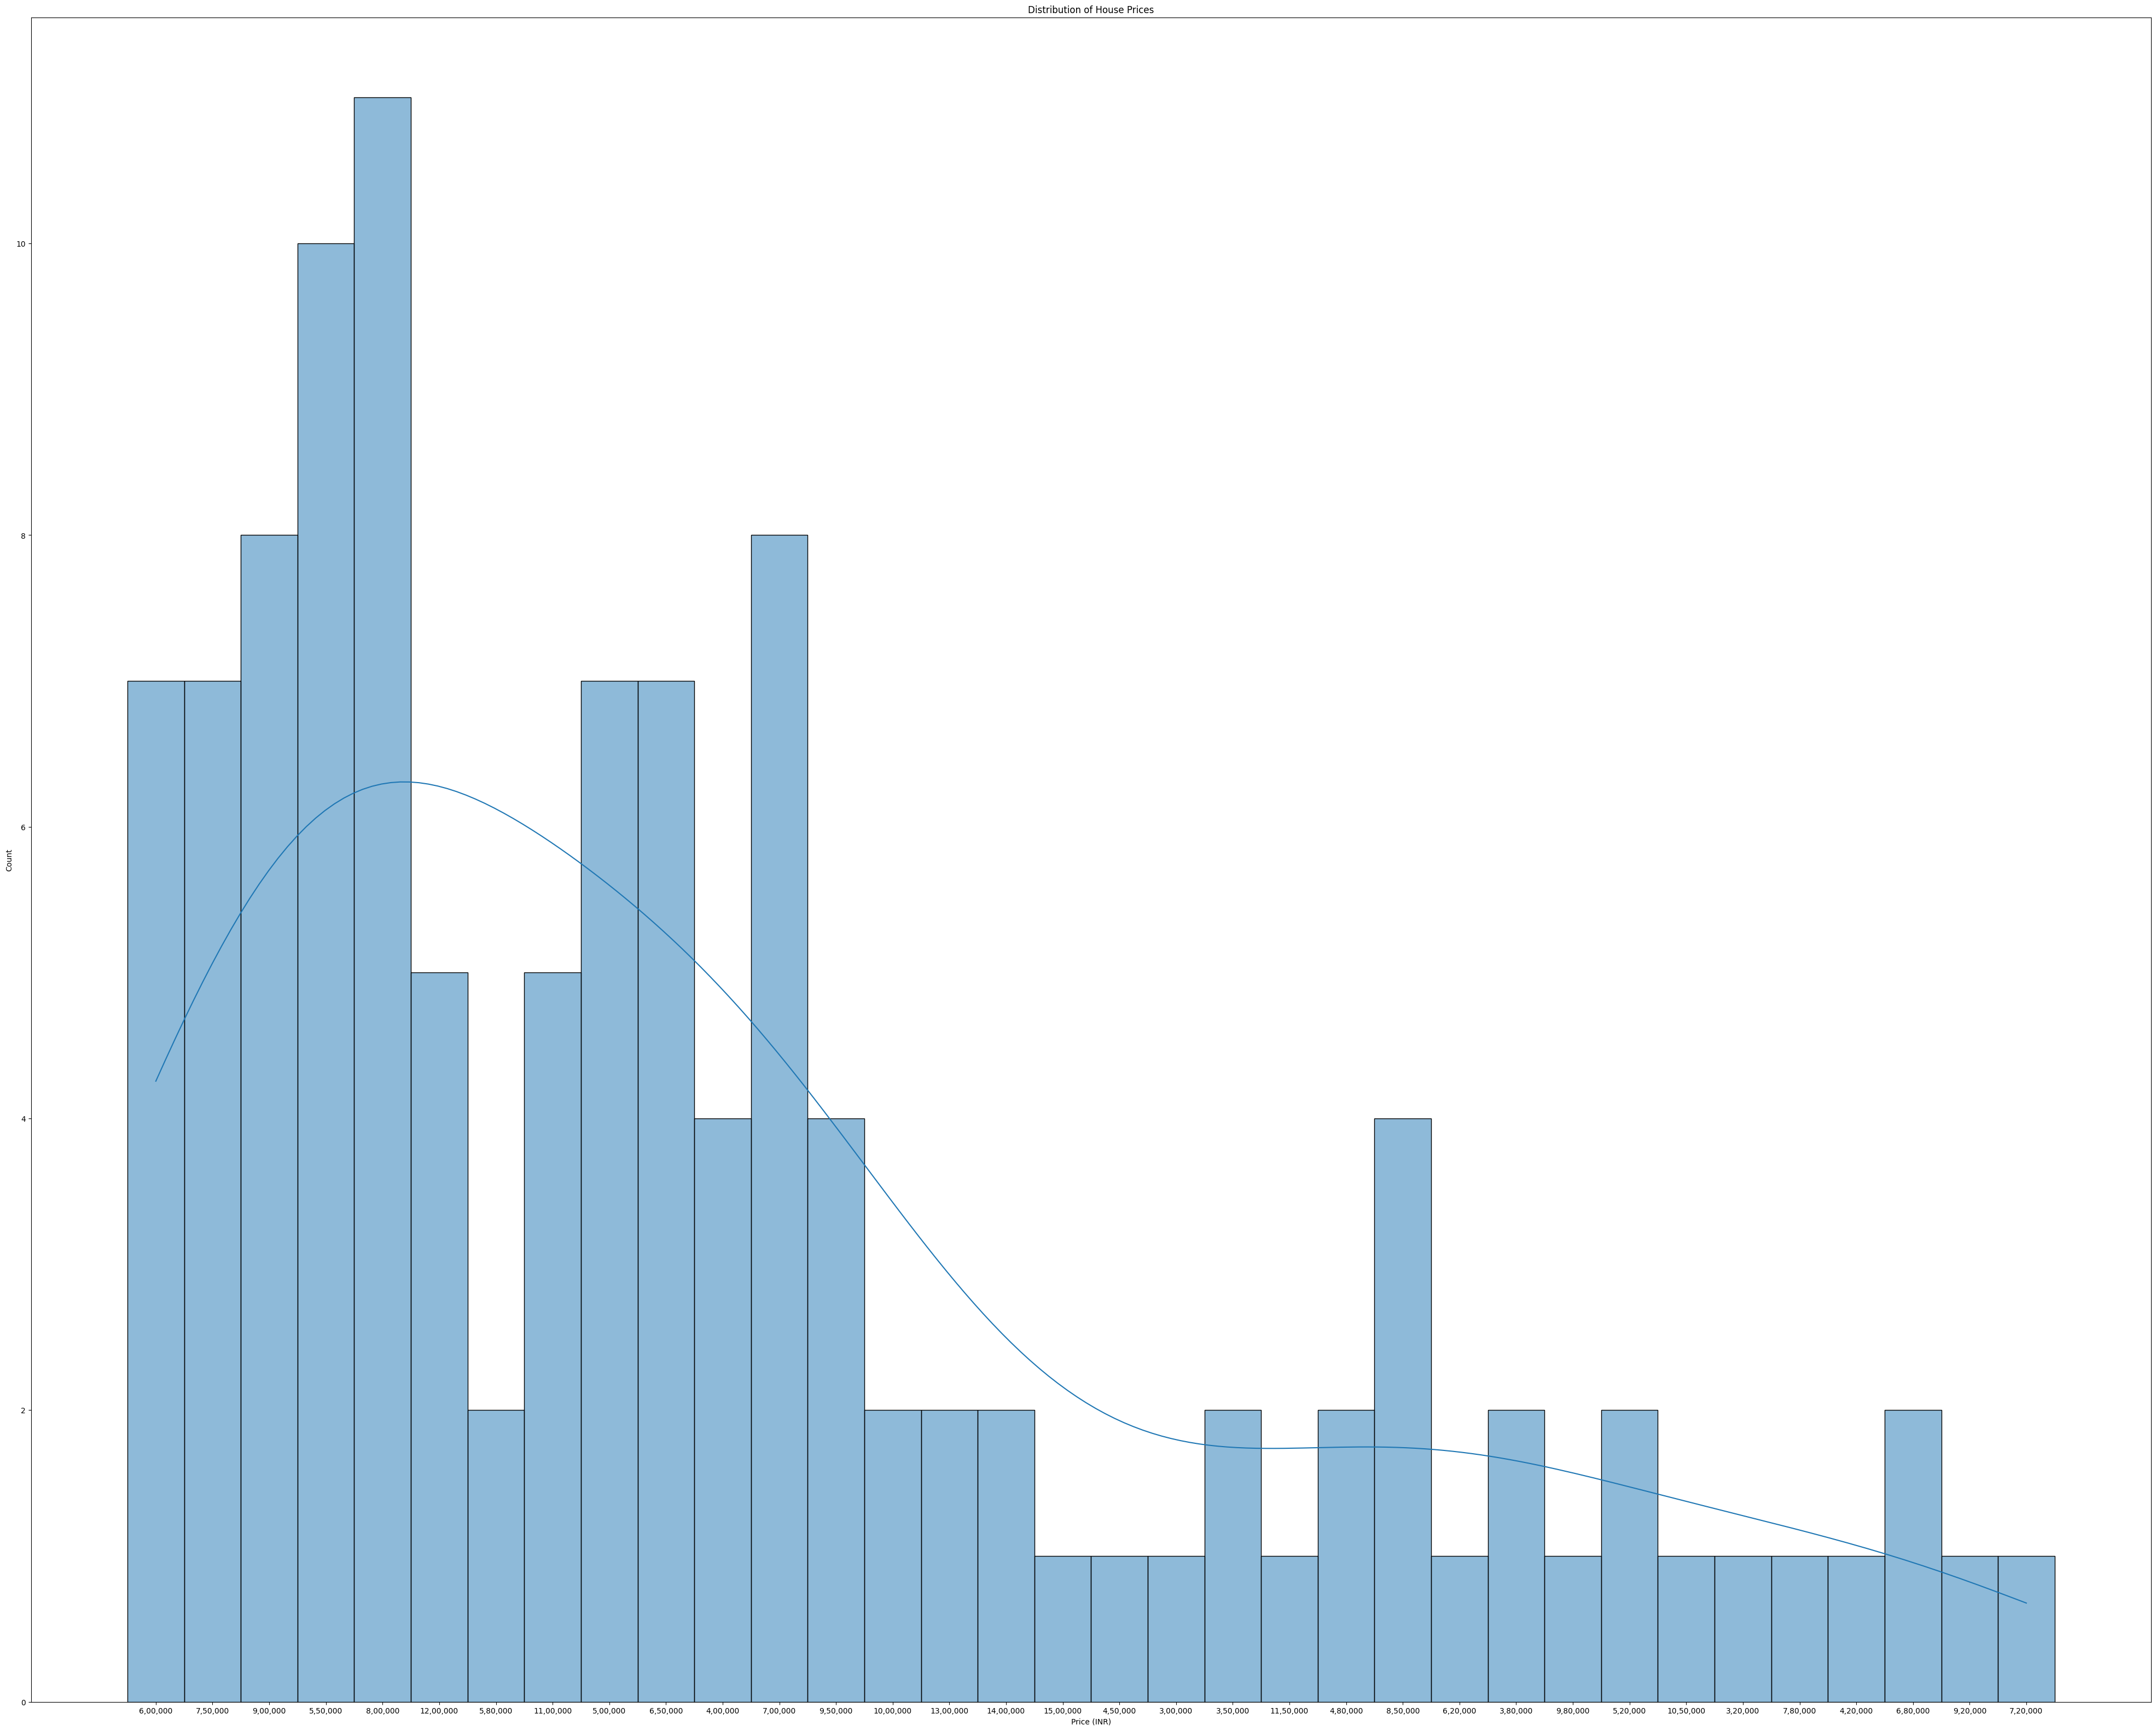

In [7]:
plt.figure(figsize=(50,40))
sns.histplot(df['Price (INR)'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (INR)')
plt.show()

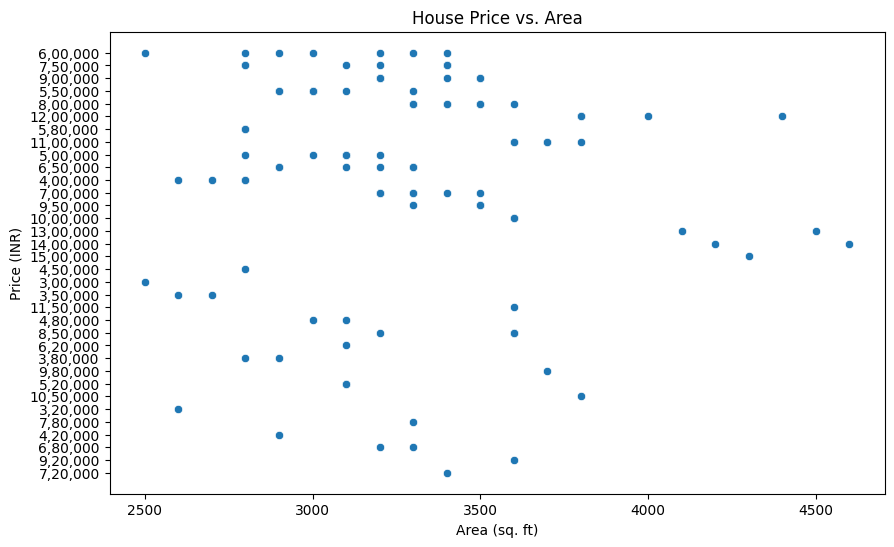

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price (INR)', data=df)
plt.title('House Price vs. Area')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (INR)')
plt.show()

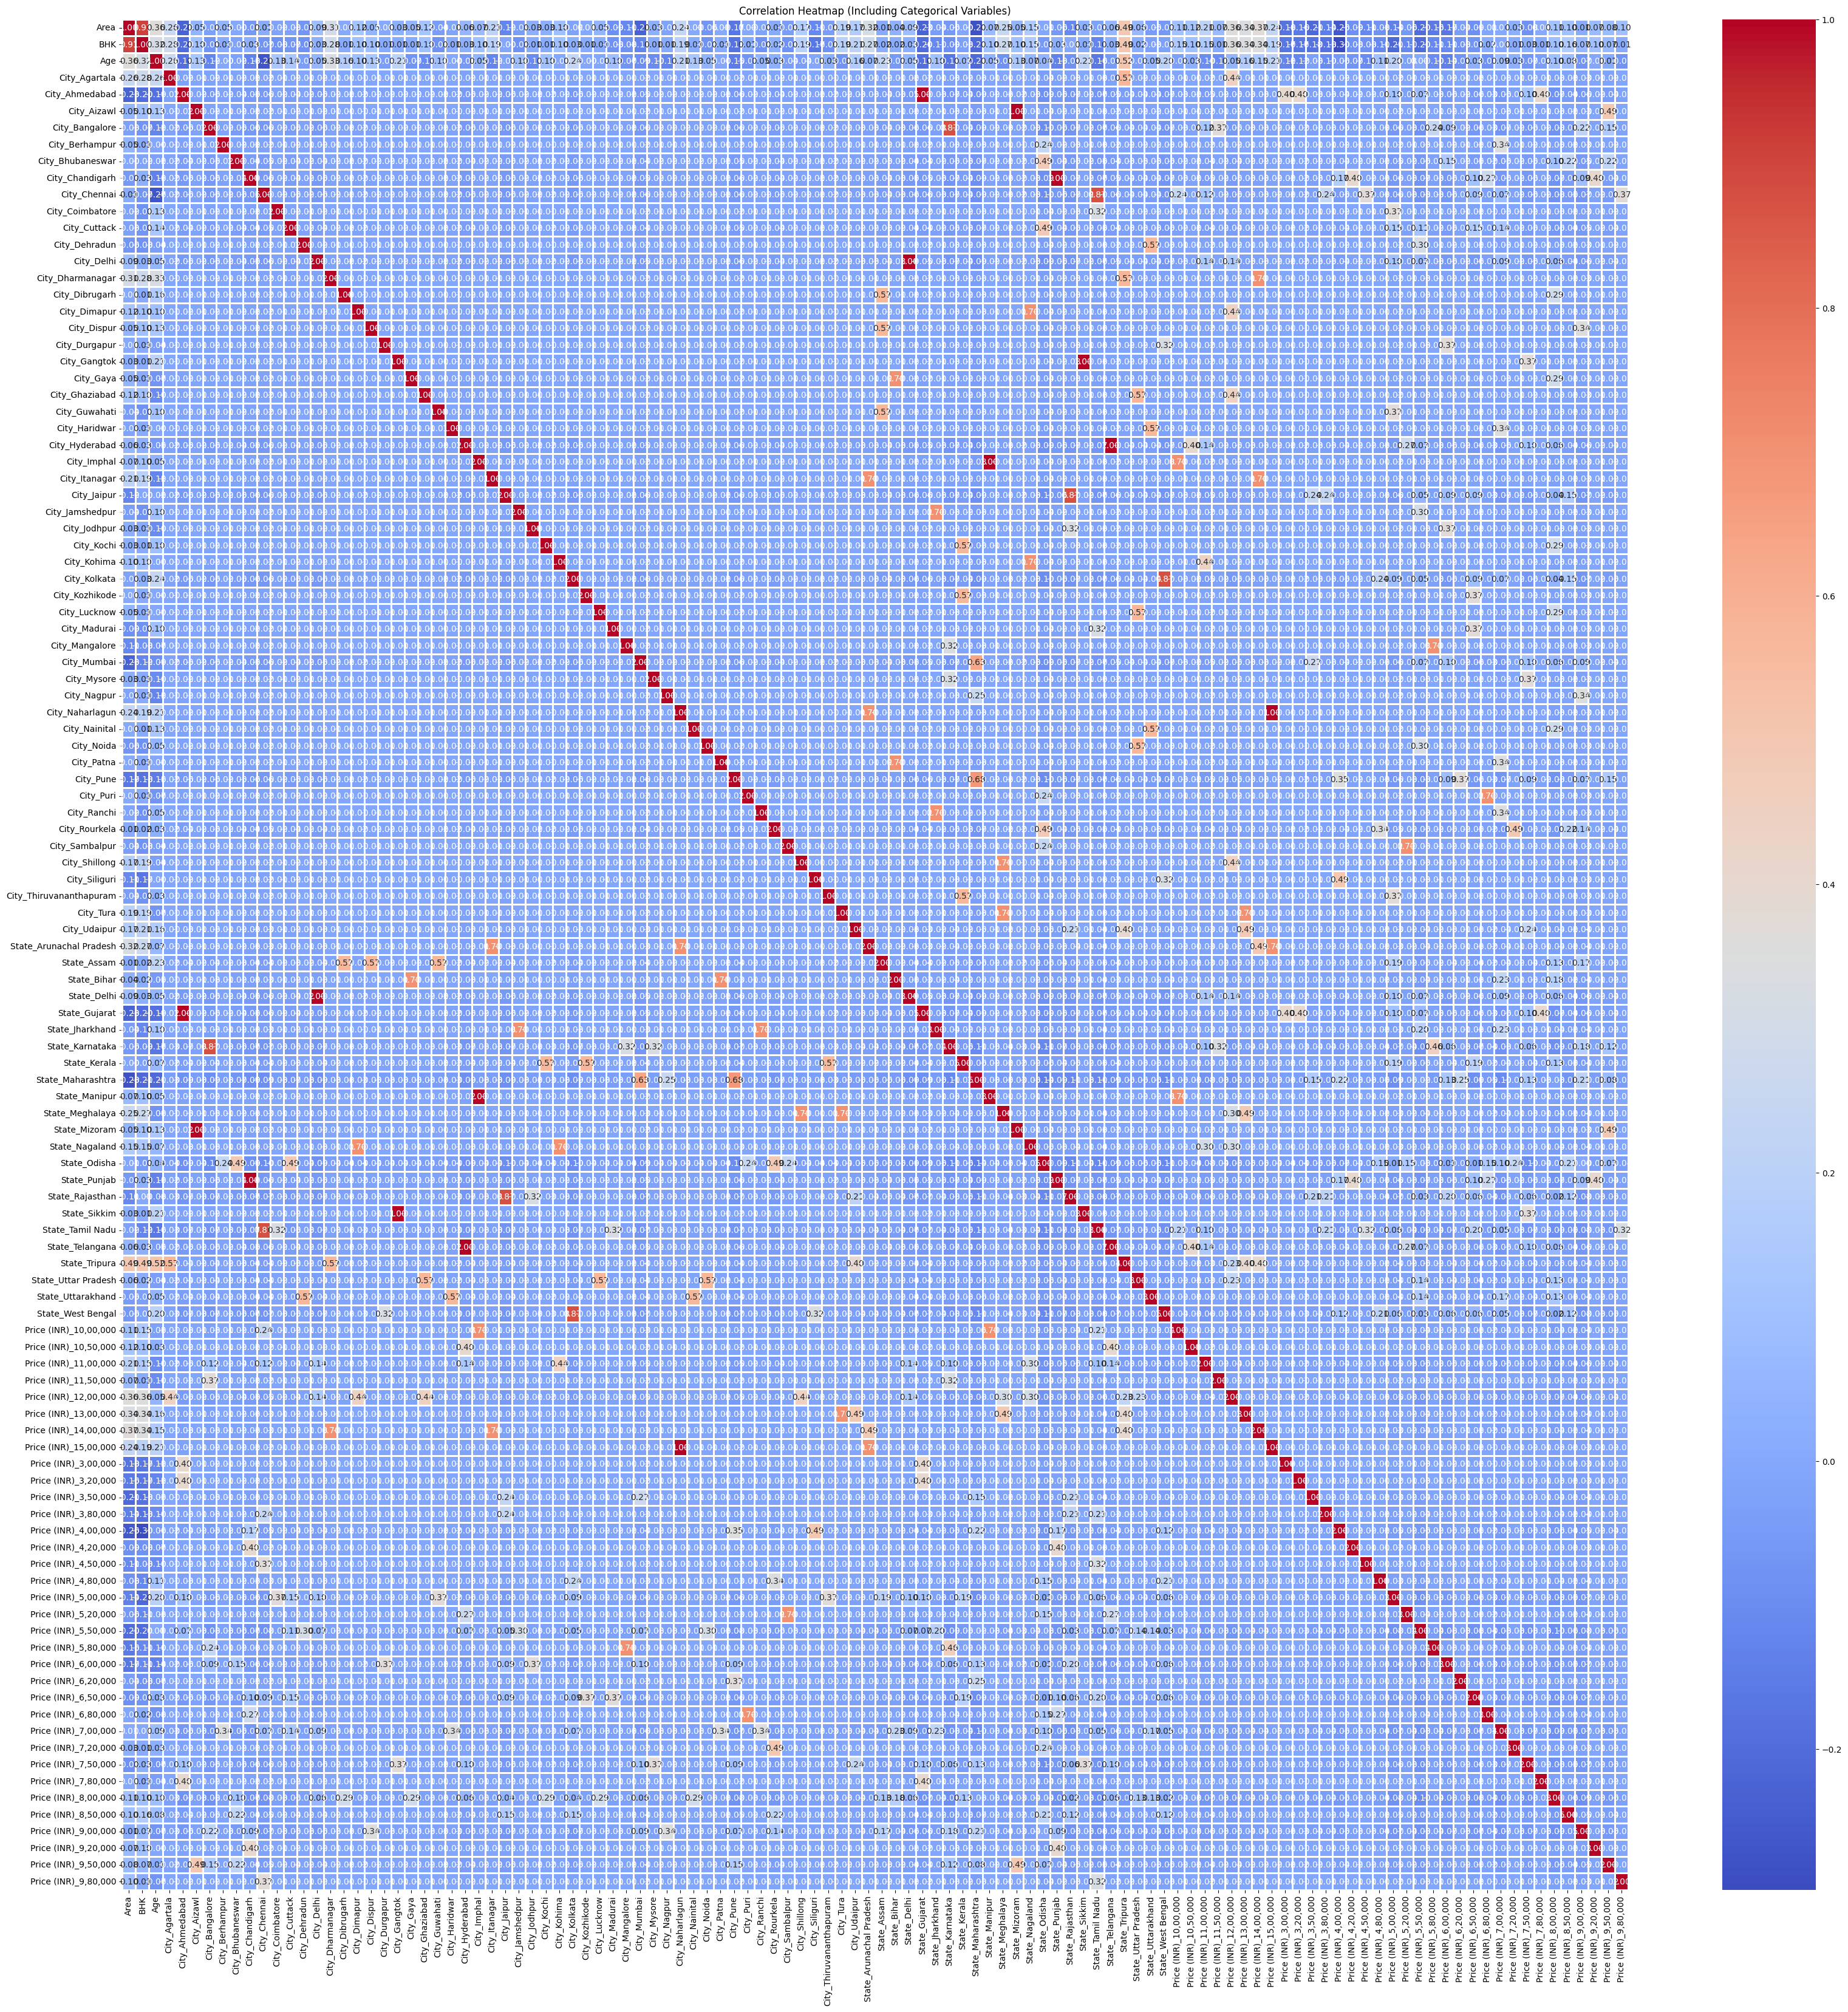

In [9]:
encoded_df = pd.get_dummies(df)
plt.figure(figsize=(40, 40))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap (Including Categorical Variables)')
plt.show()


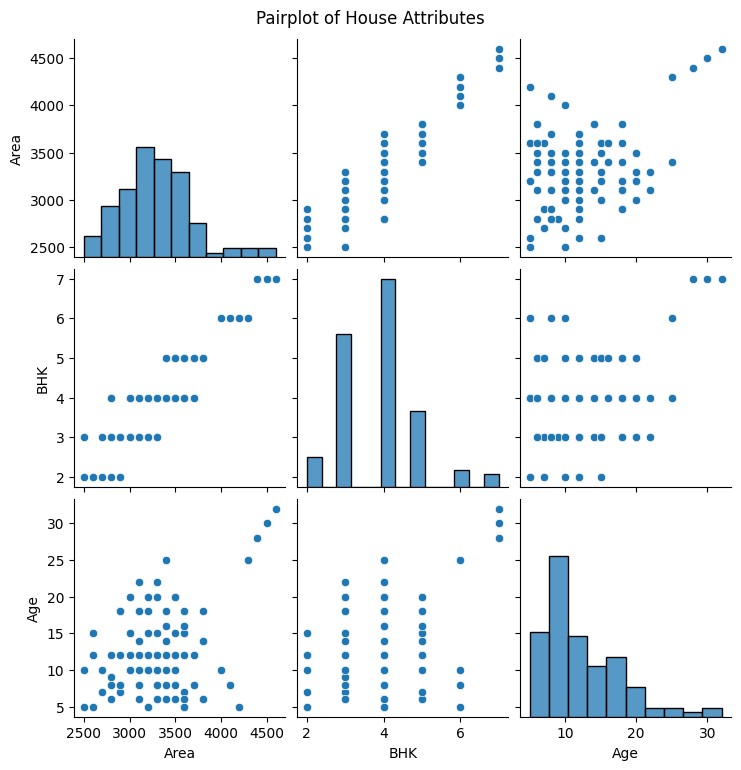

In [10]:
sns.pairplot(df[['Area', 'BHK', 'Age', 'Price (INR)']])
plt.suptitle('Pairplot of House Attributes', y=1.02)
plt.show()


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numeric_features = ['Area', 'BHK', 'Age']
categorical_features = ['City', 'State'] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
df['Price (INR)'] = df['Price (INR)'].str.replace(',', '').astype(float)
X = df.drop('Price (INR)', axis=1)
y = df['Price (INR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_processed, y_train)


LinearRegression()

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Root Mean Squared Error (RMSE): 85731.61
R-squared (R2): 0.90


In [14]:
df['City'] = df['City'].str.lower()
df['State'] = df['State'].str.lower()
city_state_mapping = df.groupby('City')['State'].agg(pd.Series.mode).to_dict()
print("Automatically generated city-state mapping:")
print(city_state_mapping)

Automatically generated city-state mapping:
{'agartala': 'tripura', 'ahmedabad': 'gujarat', 'aizawl': 'mizoram', 'bangalore': 'karnataka', 'berhampur': 'odisha', 'bhubaneswar': 'odisha', 'chandigarh': 'punjab', 'chennai': 'tamil nadu', 'coimbatore': 'tamil nadu', 'cuttack': 'odisha', 'dehradun': 'uttarakhand', 'delhi': 'delhi', 'dharmanagar': 'tripura', 'dibrugarh': 'assam', 'dimapur': 'nagaland', 'dispur': 'assam', 'durgapur': 'west bengal', 'gangtok': 'sikkim', 'gaya': 'bihar', 'ghaziabad': 'uttar pradesh', 'guwahati': 'assam', 'haridwar': 'uttarakhand', 'hyderabad': 'telangana', 'imphal': 'manipur', 'itanagar': 'arunachal pradesh', 'jaipur': 'rajasthan', 'jamshedpur': 'jharkhand', 'jodhpur': 'rajasthan', 'kochi': 'kerala', 'kohima': 'nagaland', 'kolkata': 'west bengal', 'kozhikode': 'kerala', 'lucknow': 'uttar pradesh', 'madurai': 'tamil nadu', 'mangalore': 'karnataka', 'mumbai': 'maharashtra', 'mysore': 'karnataka', 'nagpur': 'maharashtra', 'naharlagun': 'arunachal pradesh', 'naini

In [15]:
def validate_city_for_state(city, state, city_state_mapping):
    city = city.lower()
    return city_state_mapping.get(city) == state.lower()

In [16]:
def preprocess_input(input_data, preprocessor):
    input_processed = preprocessor.transform(input_data)
    return input_processed

def predict_house_price(area, bhk, age, city, state, model, preprocessor):
    input_data = pd.DataFrame({
        'Area': [area],
        'BHK': [bhk],
        'Age': [age],
        'City': [city],
        'State': [state]
    })

    input_processed = preprocess_input(input_data, preprocessor)

    predicted_price = model.predict(input_processed)[0]

    city_state_multiplier = {
        'maharashtra': {'mumbai': 1.2, 'pune': 1.1},
        'delhi': {'delhi': 1.15},
        'uttar pradesh': {'noida': 1.05, 'lucknow': 1.08, 'ghaziabad': 1.12},
        'karnataka': {'bangalore': 1.18, 'mangalore': 1.05, 'mysore': 1.07},
        'tamil nadu': {'chennai': 1.22, 'coimbatore': 1.1, 'madurai': 1.08},
        'west bengal': {'kolkata': 1.1, 'siliguri': 1.05, 'durgapur': 1.08},
        'rajasthan': {'jaipur': 1.15, 'udaipur': 1.1, 'jodhpur': 1.08},
        'bihar': {'patna': 1.1, 'gaya': 1.05},
        'jharkhand': {'ranchi': 1.1, 'jamshedpur': 1.05},
        'odisha': {'bhubaneswar': 1.12, 'cuttack': 1.08, 'rourkela': 1.1},
        'kerala': {'kochi': 1.1, 'thiruvananthapuram': 1.05, 'kozhikode': 1.08},
        'assam': {'guwahati': 1.1, 'dibrugarh': 1.05, 'dispur': 1.08},
        'uttarakhand': {'dehradun': 1.05, 'haridwar': 1.08, 'nainital': 1.1},
        'sikkim': {'gangtok': 1.12},
        'mizoram': {'aizawl': 1.15},
        'manipur': {'imphal': 1.1},
        'nagaland': {'kohima': 1.08, 'dimapur': 1.12},
        'meghalaya': {'shillong': 1.1, 'tura': 1.08},
        'arunachal pradesh': {'itanagar': 1.12, 'naharlagun': 1.15},
        'tripura': {'agartala': 1.08, 'udaipur': 1.1, 'dharmanagar': 1.12},
        'telangana': {'hyderabad': 1.15},
        'gujarat': {'ahmedabad': 1.1},
        'punjab': {'chandigarh': 1.1},
    }
    state_lower = state.lower()
    city_lower = city.lower()
    
    if state_lower in city_state_multiplier:
        state_multiplier = city_state_multiplier[state_lower]
        if city_lower in state_multiplier:
            predicted_price *= state_multiplier[city_lower]

    return predicted_price


In [17]:
def get_user_inputs_and_predict(preprocessor, model, city_state_mapping):
    while True:
        try:
            area = int(input("Enter area (in sq. ft.): "))
            bhk = int(input("Enter number of bedrooms (BHK): "))
            age = int(input("Enter age of the property (in years): "))
            city = input("Enter city: ").lower() 
            state = input("Enter state: ").lower() 

            # Validate city for the specified state
            if city_state_mapping.get(city) != state:
                print(f"The city '{city}' does not belong to the state '{state}'. Please try again.")
                continue

            predicted_price = predict_house_price(area, bhk, age, city, state, model, preprocessor)
            print(f"Predicted house price (INR): {predicted_price:.2f}")
            break

        except ValueError:
            print("Invalid input. Please enter valid numerical values for area, BHK, and age.")
get_user_inputs_and_predict(preprocessor, model, city_state_mapping)

Enter area (in sq. ft.):  3000
Enter number of bedrooms (BHK):  2
Enter age of the property (in years):  2
Enter city:  mumbai
Enter state:  odisha


The city 'mumbai' does not belong to the state 'odisha'. Please try again.


Enter area (in sq. ft.):  200
Enter number of bedrooms (BHK):  3
Enter age of the property (in years):  2
Enter city:  puri
Enter state:  odisha


Predicted house price (INR): 411600.00


In [18]:
import joblib
joblib.dump(model, 'housepred.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')


['preprocessor.joblib']